In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from os.path import join

import tensorflow as tf 
from tensorflow.keras import layers, models, optimizers, Input, Model
from tensorflow.keras.utils import to_categorical

(400,)


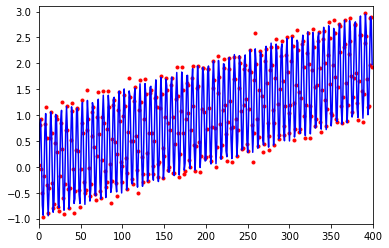

In [2]:
#DATA SET
data_time = np.sin(np.arange(400))+ np.random.normal(0, 0.1, 400) + np.arange(400)/200 
print(data_time.shape)
plt.plot(data_time,'r.')
plt.plot(range(400), np.sin(np.arange(400))+np.arange(400)/200, 'b')
plt.xlim(-0.5, 400.5)
plt.ylim(-1.1, 3.1)
plt.show()

In [3]:
batch_size = 10
sequence_length = 4
data_dim = 3

In [4]:
#DATA_MATRIX
data_matrix = []
seq_len = 3
for i in range(0, len(data_time)-data_dim*sequence_length):
    tmp_data = data_time[i:i+data_dim*sequence_length+1]
    data_matrix.append(tmp_data)
    
data_matrix_np = np.array(data_matrix)
print(data_matrix_np.shape)
print(data_matrix_np)

(388, 13)
[[ 0.03666313  0.80979465  0.93153913 ... -0.34606148 -0.89031829
  -0.41772677]
 [ 0.80979465  0.93153913 -0.03403718 ... -0.89031829 -0.41772677
   0.55130935]
 [ 0.93153913 -0.03403718 -0.49750554 ... -0.41772677  0.55130935
   1.06772184]
 ...
 [ 3.21150744  2.54854899  1.46866182 ...  1.17706163  1.97411864
   2.88392053]
 [ 2.54854899  1.46866182  0.86206136 ...  1.97411864  2.88392053
   2.88620125]
 [ 1.46866182  0.86206136  1.4126501  ...  2.88392053  2.88620125
   1.93504043]]


In [5]:
datax = data_matrix_np[0:data_matrix_np.shape[0]-1,0:12]
datay = data_matrix_np[0:data_matrix_np.shape[0]-1,12]
print(datax.shape)
print(datay.shape)

(387, 12)
(387,)


In [6]:
datax = np.reshape(datax, (-1, sequence_length, data_dim))
print(datax.shape)
print(datay.shape)

(387, 4, 3)
(387,)


In [7]:
trnx = datax[0:300, :]
trny = datay[0:300]
tstx = datax[300:datax.shape[0], :]
tsty = datay[300:datax.shape[0]]
print(trnx.shape)
print(tstx.shape)
print(trny.shape)
print(tsty.shape)

(300, 4, 3)
(87, 4, 3)
(300,)
(87,)


In [8]:
input_shape = (trnx[0].shape)
input_tensor = layers.Input(input_shape)

In [9]:
rnn_layer = layers.LSTM(10)(input_tensor)
output_tensor = layers.Dense(1, activation = "tanh")(rnn_layer) # change from linear to tanh 

2022-05-12 21:44:39.244828: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-12 21:44:39.378089: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-12 21:44:39.378610: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-12 21:44:39.380415: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [10]:
model_mtoo = models.Model(input_tensor, output_tensor)
model_mtoo.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

In [11]:
model_mtoo.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 3)]            0         
                                                                 
 lstm (LSTM)                 (None, 10)                560       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model_mtoo.fit(trnx, trny, validation_data = [tstx, tsty], batch_size = 10, epochs = 300)

Epoch 1/300
30/30 [==============================] - 0s 2ms/step - loss: 0.2429 - mean_squared_error: 0.2429 - val_loss: 1.1486 - val_mean_squared_error: 1.1486
Epoch 2/300
30/30 [==============================] - 0s 2ms/step - loss: 0.2429 - mean_squared_error: 0.2429 - val_loss: 1.1481 - val_mean_squared_error: 1.1481
Epoch 3/300
30/30 [==============================] - 0s 2ms/step - loss: 0.2431 - mean_squared_error: 0.2431 - val_loss: 1.1484 - val_mean_squared_error: 1.1484
Epoch 4/300
30/30 [==============================] - 0s 2ms/step - loss: 0.2430 - mean_squared_error: 0.2430 - val_loss: 1.1481 - val_mean_squared_error: 1.1481
Epoch 5/300
30/30 [==============================] - 0s 3ms/step - loss: 0.2431 - mean_squared_error: 0.2431 - val_loss: 1.1480 - val_mean_squared_error: 1.1480
Epoch 6/300
30/30 [==============================] - 0s 3ms/step - loss: 0.2431 - mean_squared_error: 0.2431 - val_loss: 1.1487 - val_mean_squared_error: 1.1487
Epoch 7/300
30/30 [===============

30/30 [==============================] - 0s 2ms/step - loss: 0.2431 - mean_squared_error: 0.2431 - val_loss: 1.1483 - val_mean_squared_error: 1.1483
Epoch 52/300
30/30 [==============================] - 0s 2ms/step - loss: 0.2428 - mean_squared_error: 0.2428 - val_loss: 1.1486 - val_mean_squared_error: 1.1486
Epoch 53/300
30/30 [==============================] - 0s 2ms/step - loss: 0.2428 - mean_squared_error: 0.2428 - val_loss: 1.1486 - val_mean_squared_error: 1.1486
Epoch 54/300
30/30 [==============================] - 0s 2ms/step - loss: 0.2435 - mean_squared_error: 0.2435 - val_loss: 1.1487 - val_mean_squared_error: 1.1487
Epoch 55/300
30/30 [==============================] - 0s 4ms/step - loss: 0.2429 - mean_squared_error: 0.2429 - val_loss: 1.1485 - val_mean_squared_error: 1.1485
Epoch 56/300
30/30 [==============================] - 0s 3ms/step - loss: 0.2429 - mean_squared_error: 0.2429 - val_loss: 1.1488 - val_mean_squared_error: 1.1488
Epoch 57/300
30/30 [=====================

30/30 [==============================] - 0s 4ms/step - loss: 0.2426 - mean_squared_error: 0.2426 - val_loss: 1.1482 - val_mean_squared_error: 1.1482
Epoch 102/300
30/30 [==============================] - 0s 3ms/step - loss: 0.2427 - mean_squared_error: 0.2427 - val_loss: 1.1485 - val_mean_squared_error: 1.1485
Epoch 103/300
30/30 [==============================] - 0s 2ms/step - loss: 0.2427 - mean_squared_error: 0.2427 - val_loss: 1.1481 - val_mean_squared_error: 1.1481
Epoch 104/300
30/30 [==============================] - 0s 2ms/step - loss: 0.2426 - mean_squared_error: 0.2426 - val_loss: 1.1495 - val_mean_squared_error: 1.1495
Epoch 105/300
30/30 [==============================] - 0s 2ms/step - loss: 0.2426 - mean_squared_error: 0.2426 - val_loss: 1.1490 - val_mean_squared_error: 1.1490
Epoch 106/300
30/30 [==============================] - 0s 2ms/step - loss: 0.2425 - mean_squared_error: 0.2425 - val_loss: 1.1495 - val_mean_squared_error: 1.1495
Epoch 107/300
30/30 [===============

30/30 [==============================] - 0s 2ms/step - loss: 0.2422 - mean_squared_error: 0.2422 - val_loss: 1.1483 - val_mean_squared_error: 1.1483
Epoch 152/300
30/30 [==============================] - 0s 2ms/step - loss: 0.2423 - mean_squared_error: 0.2423 - val_loss: 1.1481 - val_mean_squared_error: 1.1481
Epoch 153/300
30/30 [==============================] - 0s 2ms/step - loss: 0.2425 - mean_squared_error: 0.2425 - val_loss: 1.1485 - val_mean_squared_error: 1.1485
Epoch 154/300
30/30 [==============================] - 0s 3ms/step - loss: 0.2423 - mean_squared_error: 0.2423 - val_loss: 1.1487 - val_mean_squared_error: 1.1487
Epoch 155/300
30/30 [==============================] - 0s 2ms/step - loss: 0.2424 - mean_squared_error: 0.2424 - val_loss: 1.1486 - val_mean_squared_error: 1.1486
Epoch 156/300
30/30 [==============================] - 0s 2ms/step - loss: 0.2423 - mean_squared_error: 0.2423 - val_loss: 1.1486 - val_mean_squared_error: 1.1486
Epoch 157/300
30/30 [===============

30/30 [==============================] - 0s 2ms/step - loss: 0.2422 - mean_squared_error: 0.2422 - val_loss: 1.1487 - val_mean_squared_error: 1.1487
Epoch 202/300
30/30 [==============================] - 0s 3ms/step - loss: 0.2419 - mean_squared_error: 0.2419 - val_loss: 1.1489 - val_mean_squared_error: 1.1489
Epoch 203/300
30/30 [==============================] - 0s 3ms/step - loss: 0.2423 - mean_squared_error: 0.2423 - val_loss: 1.1495 - val_mean_squared_error: 1.1495
Epoch 204/300
30/30 [==============================] - 0s 4ms/step - loss: 0.2422 - mean_squared_error: 0.2422 - val_loss: 1.1494 - val_mean_squared_error: 1.1494
Epoch 205/300
30/30 [==============================] - 0s 3ms/step - loss: 0.2427 - mean_squared_error: 0.2427 - val_loss: 1.1484 - val_mean_squared_error: 1.1484
Epoch 206/300
30/30 [==============================] - 0s 3ms/step - loss: 0.2421 - mean_squared_error: 0.2421 - val_loss: 1.1488 - val_mean_squared_error: 1.1488
Epoch 207/300
30/30 [===============

30/30 [==============================] - 0s 3ms/step - loss: 0.2417 - mean_squared_error: 0.2417 - val_loss: 1.1491 - val_mean_squared_error: 1.1491
Epoch 252/300
30/30 [==============================] - 0s 3ms/step - loss: 0.2419 - mean_squared_error: 0.2419 - val_loss: 1.1492 - val_mean_squared_error: 1.1492
Epoch 253/300
30/30 [==============================] - 0s 3ms/step - loss: 0.2421 - mean_squared_error: 0.2421 - val_loss: 1.1490 - val_mean_squared_error: 1.1490
Epoch 254/300
30/30 [==============================] - 0s 3ms/step - loss: 0.2418 - mean_squared_error: 0.2418 - val_loss: 1.1489 - val_mean_squared_error: 1.1489
Epoch 255/300
30/30 [==============================] - 0s 3ms/step - loss: 0.2420 - mean_squared_error: 0.2420 - val_loss: 1.1494 - val_mean_squared_error: 1.1494
Epoch 256/300
30/30 [==============================] - 0s 5ms/step - loss: 0.2418 - mean_squared_error: 0.2418 - val_loss: 1.1481 - val_mean_squared_error: 1.1481
Epoch 257/300
30/30 [===============

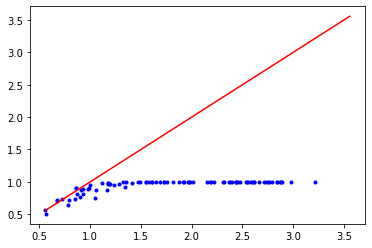

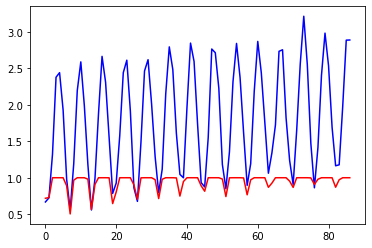

Final validation error is: 1.150069


In [15]:
plt.plot(tsty, model_mtoo.predict(tstx), 'b.')
plt.plot(np.arange(min(tsty),max(tsty)+1),np.arange(min(tsty),max(tsty)+1), 'r')
plt.show()

plt.plot(range(tsty.shape[0]), tsty,'b-')
plt.plot(range(tsty.shape[0]), model_mtoo.predict(tstx),'r-')
plt.show()
print("Final validation error is: %f" % history.history['val_mean_squared_error'][len(history.history['val_mean_squared_error'])-1])